<a href="https://colab.research.google.com/github/manavgurnani21/data_augmentation_tld_research/blob/main/LISA_Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 1: Histogram Equalization

Getting the dataset from Kaggle

In [4]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manavgurnani","key":"113742897ee1d8c39ed6080330a0eb90"}'}

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6014        195  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1631         70  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12018        306  1.0              
pantanjali/unemployment-dataset                                Un

In [10]:
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset

100% 4.21G/4.21G [00:48<00:00, 122MB/s] 
100% 4.21G/4.21G [00:48<00:00, 93.2MB/s]


In [11]:
!unzip lisa-traffic-light-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01973.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01974.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01975.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01976.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01977.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01978.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01979.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01980.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01981.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01982.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01983.jpg  
  inflating: nightTrain/nightTrain/nightClip2/frames/nightClip2--01984.jpg  
  inflating: nightTrain/n

# Preprocessing the Dataset

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

In [13]:
data_directory = pathlib.Path('/content/dayTrain/dayTrain/dayClip1')

2161


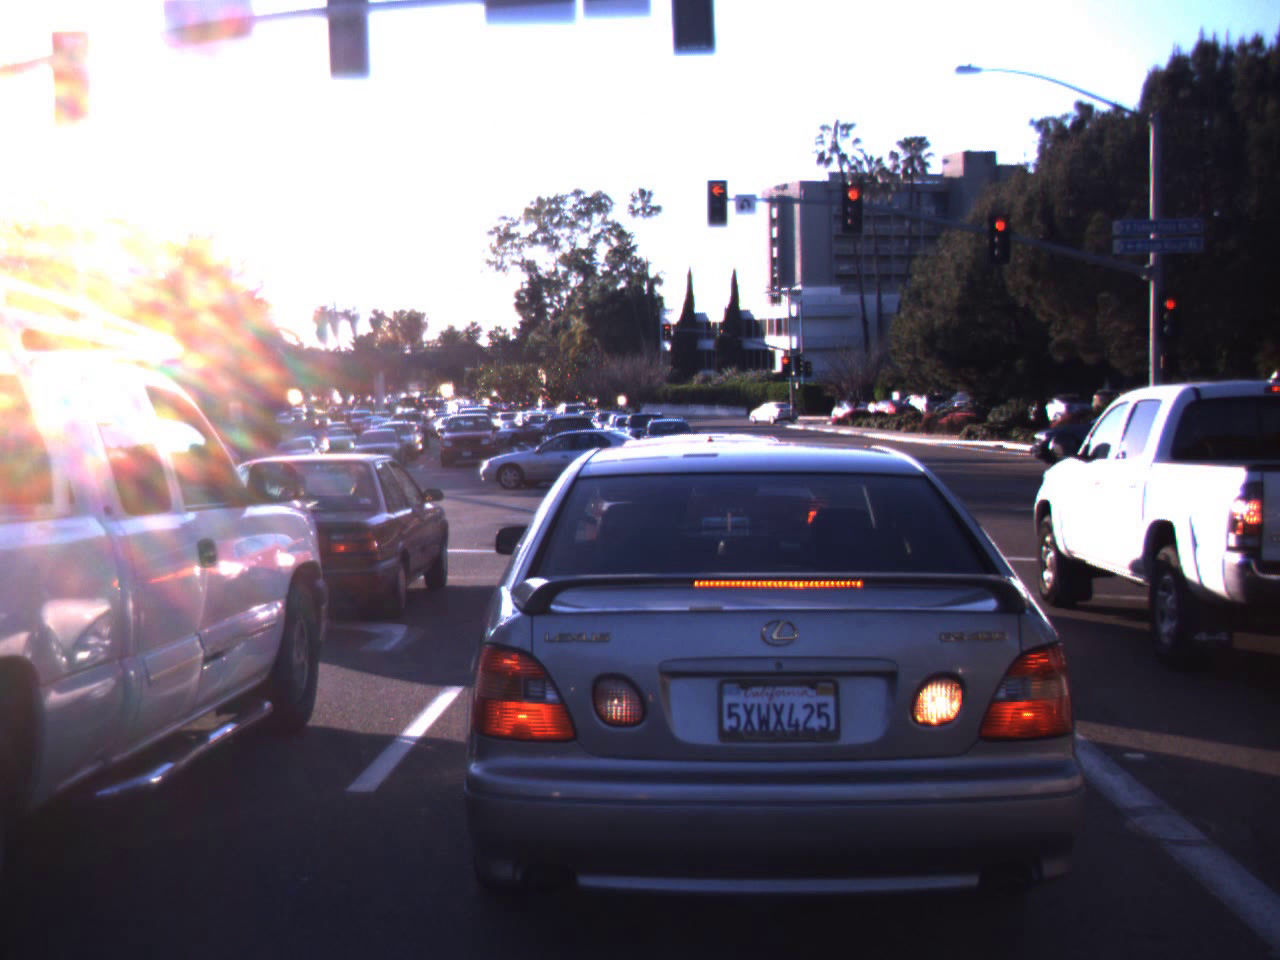

In [14]:
day_seq_1 = list(data_directory.glob('frames/*'))
print(len(day_seq_1))
PIL.Image.open(str(day_seq_1[0]))

# Splitting the Dataset into Test Train and Valid

In [15]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2161 files belonging to 1 classes.
Using 1729 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2161 files belonging to 1 classes.
Using 432 files for validation.


In [17]:
from tqdm import tqdm
import pandas as pd
train_day = []
for clipName in tqdm(sorted(os.listdir('/content/Annotations/Annotations/dayTrain/'))):
    df = pd.read_csv(os.path.join('/content/Annotations/Annotations/dayTrain/',clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_day.append(df)

train_day_df = pd.concat(train_day,axis=0)

100%|██████████| 13/13 [00:00<00:00, 61.62it/s]


In [22]:
class_names = df['Annotation tag'].unique()
class_names

array(['stop', 'stopLeft', 'go', 'goLeft', 'warningLeft'], dtype=object)

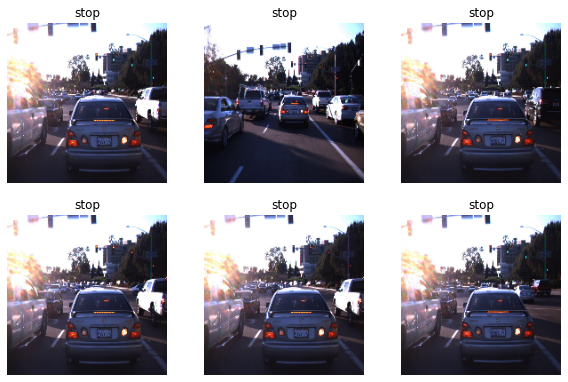

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [23]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


NameError: ignored

In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [25]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [26]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
__________________________________

In [27]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model_ever.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=[early, checkpoint],
  epochs=epochs
)

Epoch 1/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 243s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 240s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 240s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 239s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 240s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 238s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 241s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 238s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 9/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 240s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

55/55 [==============================] - 238s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


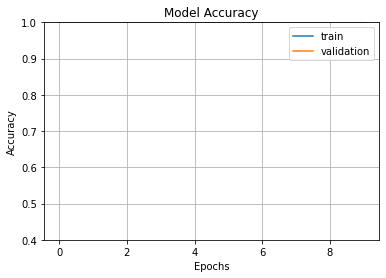

In [31]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

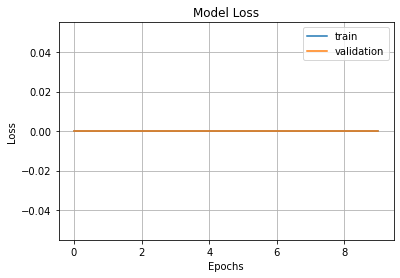

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()